**Devindra Sawh Group 2 DSC540: Project Milestone**


#####  SVM Classifier 


In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving data.csv to data (1).csv


In [4]:

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import pylab as plt
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [11]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading Raw file for SVC modeling

df = pd.read_csv('data.csv')

In [5]:

## Data Processing to remove popularity of 0
test_set = df[df.popularity == 0]
train_and_validation = df[df["popularity"] != 0]
y = train_and_validation.popularity
# Keep only numeric attributes 
X_numeric = train_and_validation.drop(['popularity', 'id', 'release_date', 'name', 'artists'], axis=1)


# Standardization of the data  -- SVC performs better with standardized data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_numeric)
X_scaled = ss.transform(X_numeric)
X_scaled

# Divide classes into quartiles for target variable.  This will change popularity into 4 quartiles where q4 is the 
#most popular songs
y_quartile = []
for val in y:
    if(val <= 25):
        y_quartile.append("q1")
    elif(val > 26 and val <= 50):
        y_quartile.append("q2")
    elif(val > 51 and val <= 75):
        y_quartile.append("q3")
    else:
        y_quartile.append("q4")
len(y_quartile)




133484

In [ ]:
# using X_scaled and y_quartile  so therefore run code from above sections to get X_scaled and Y_quartile

In [ ]:
len(X_scaled)

133484

In [6]:
len(y_quartile)

133484

In [ ]:
type(y_quartile)

list

In [7]:
y_quartile =  np.array(y_quartile)  ## change the target from list to numpy for modeling

In [8]:
# rename variable so i can use split and train code 

X= X_scaled
y= y_quartile

In [9]:
#split data without stratifiy. We know the data set is imbalance based on EDA analyis
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.50, random_state=2020)

In [ ]:
#create 1st model with  defaults using non-stratisfied data
from sklearn.svm import SVC # "Support vector classifier"
model = SVC()  #support vector classifer with RBF
model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predict for training
predTrain = model.predict(X_train)

In [ ]:
#accuracy for training
metrics.accuracy_score(y_true = y_train, y_pred = predTrain)

0.7119355128704564

In [ ]:
#balanced accuracy for training
balanced_accuracy_score(y_train, predTrain)

0.5213312803080515

In [ ]:
#predict for validation 
predVal = model.predict(X_val)


In [ ]:
#accuracy for predictions
metrics.accuracy_score(y_true = y_val, y_pred = predVal)

0.7021815348656019

In [ ]:
#balanced accuracy for validation
balanced_accuracy_score(y_val, predVal)

0.5158769324318149

In [ ]:
#confusion Matrix  --- simple one to see that the last quartile is not getting any classifications !!!
treeGS = confusion_matrix(y_val, predVal)
print(treeGS)

[[16966  4930  1381     0]
 [ 3448 24058  1157     0]
 [  708  5244  5841     0]
 [  451  1673   885     0]]


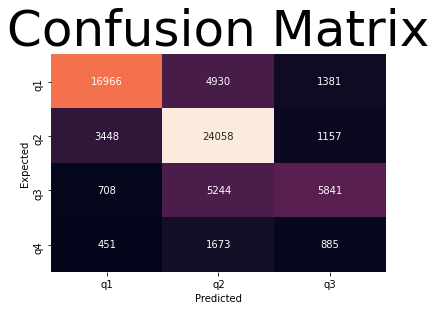

In [ ]:
# here you can see that the confusion visualization is missing predicted column of q4. 

confusion_matrix =  pd.crosstab(index=y_val, columns=predVal.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 50)
plt.show()

In [ ]:
#classificaiton report confirms q4 is not doing well in this model. 
print(classification_report(y_val, predVal))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          q1       0.79      0.73      0.76     23277
          q2       0.67      0.84      0.75     28663
          q3       0.63      0.50      0.55     11793
          q4       0.00      0.00      0.00      3009

    accuracy                           0.70     66742
   macro avg       0.52      0.52      0.51     66742
weighted avg       0.67      0.70      0.68     66742



**Create Stratify Data Sets**  this is to address the class imbalance for Q4

In [14]:
#resplit the data but using the stratified on target valirable 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.50, random_state=2020, stratify=y)

In [ ]:
#create Object 2 with stratify data sets.   still use RBF but with balanced for class weight 
from sklearn.svm import SVC # "Support vector classifier"
model2 = SVC(class_weight = 'balanced')  #support vector classifer with RBF
model2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predict for training
predTrain = model2.predict(X_train)

In [ ]:
#accuracy for training
metrics.accuracy_score(y_true = y_train, y_pred = predTrain)

0.6850558868478619

In [ ]:
#balanced accuracy for training
balanced_accuracy_score(y_train, predTrain)

0.5676952975043066

In [ ]:
#predict for validation 
predVal = model2.predict(X_val)

In [ ]:
#accuracy for validation 
metrics.accuracy_score(y_true = y_val, y_pred = predVal)

0.6659374906355818

In [ ]:
#balanced accuracy for validation
balanced_accuracy_score(y_val, predVal)

0.531894442433921

In [ ]:
#confusion Matrix  --- can see now that the last column for q4 is present
treeGS = confusion_matrix(y_val, predVal)
print(treeGS)

[[16596  3960  1945   754]
 [ 3697 20532  3447  1075]
 [  511  3617  7008   643]
 [  435  1340   872   310]]


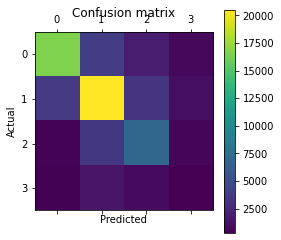

In [ ]:
#confusion matrix visualization 
%matplotlib inline
plt.matshow(treeGS)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

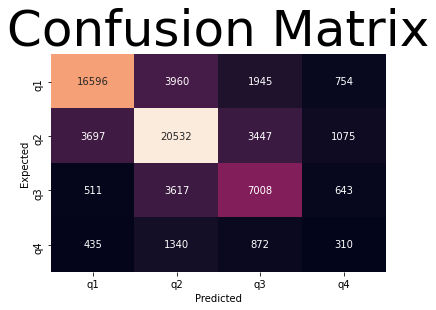

In [ ]:
#confusion matrix visualization  2
confusion_matrix =  pd.crosstab(index=y_val, columns=predVal.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 50)
plt.show()

In [ ]:
#Q4 is performing better than model before. 

print(classification_report(y_val, predVal))


              precision    recall  f1-score   support

          q1       0.78      0.71      0.75     23255
          q2       0.70      0.71      0.71     28751
          q3       0.53      0.59      0.56     11779
          q4       0.11      0.10      0.11      2957

    accuracy                           0.67     66742
   macro avg       0.53      0.53      0.53     66742
weighted avg       0.67      0.67      0.67     66742



**without class weight as balanced**

In [ ]:
#create same model2 without class weight as balance 
from sklearn.svm import SVC # "Support vector classifier"
model3 = SVC()  
model3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predict for training
predTrain = model3.predict(X_train)
 

In [ ]:
#accuracy for training
metrics.accuracy_score(y_true = y_train, y_pred = predTrain)

0.711605885349555

In [ ]:
#balanced accuracy for training
balanced_accuracy_score(y_train, predTrain)

0.5222045234997426

In [ ]:
#predict for validation 
predVal = model3.predict(X_val)

In [ ]:
#accuracy for validation 
metrics.accuracy_score(y_true = y_val, y_pred = predVal)

0.7029007221839322

In [ ]:
#balanced accuracy for validation
balanced_accuracy_score(y_val, predVal)

0.5152627669811356

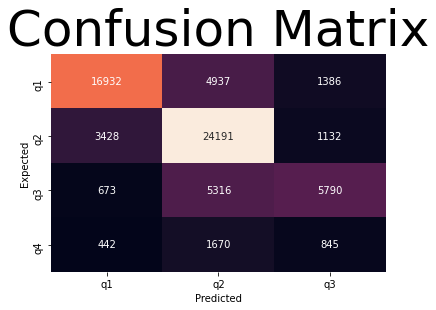

In [ ]:
# same issue as before as the class weight shows the q4 not have any classification. 
# therefore will keep class weight as balanced  (this is hyper paramter turning)

confusion_matrix =  pd.crosstab(index=y_val, columns=predVal.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 50)
plt.show()

In [ ]:
print(classification_report(y_val, predVal))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          q1       0.79      0.73      0.76     23255
          q2       0.67      0.84      0.75     28751
          q3       0.63      0.49      0.55     11779
          q4       0.00      0.00      0.00      2957

    accuracy                           0.70     66742
   macro avg       0.52      0.52      0.51     66742
weighted avg       0.67      0.70      0.68     66742



In [33]:
#create same model2 with class weight as balance and fine tuning C
from sklearn.svm import SVC # "Support vector classifier"
model3a = SVC(C= .5, class_weight = 'balanced')  
model3a.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
#Predict for training
predTrain = model3a.predict(X_train)

In [35]:
#accuracy for training
metrics.accuracy_score(y_true = y_train, y_pred = predTrain)

0.6819394084684307

In [36]:
#balanced accuracy for training
balanced_accuracy_score(y_train, predTrain)

0.5524317556689847

In [37]:
#predict for validation 
predVal = model3a.predict(X_val)

In [38]:
#accuracy for validation 
metrics.accuracy_score(y_true = y_val, y_pred = predVal)

0.6681999340744958

In [39]:
#balanced accuracy for validation
balanced_accuracy_score(y_val, predVal)

0.5282270727980234

In [40]:
treeGS = confusion_matrix(y_val, predVal)
print(treeGS)
print(classification_report(y_val, predVal))

[[16464  4124  2134   533]
 [ 3705 20736  3637   673]
 [  511  3586  7177   505]
 [  437  1380   920   220]]
              precision    recall  f1-score   support

          q1       0.78      0.71      0.74     23255
          q2       0.70      0.72      0.71     28751
          q3       0.52      0.61      0.56     11779
          q4       0.11      0.07      0.09      2957

    accuracy                           0.67     66742
   macro avg       0.53      0.53      0.52     66742
weighted avg       0.67      0.67      0.67     66742



In [24]:
#create same model2 with class weight as balance and fine tuning C as .05
from sklearn.svm import SVC # "Support vector classifier"
model3a = SVC(C= 10, class_weight = 'balanced')  #need to change kernel to another type from the default
model3a.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
#Predict for training
predTrain = model3a.predict(X_train)

In [26]:
#accuracy for training
metrics.accuracy_score(y_true = y_train, y_pred = predTrain)

0.697506817296455

In [27]:
#balanced accuracy for training
balanced_accuracy_score(y_train, predTrain)

0.6345876785977683

In [28]:
#predict for validation 
predVal = model3a.predict(X_val)

In [29]:
#accuracy for validation 
metrics.accuracy_score(y_true = y_val, y_pred = predVal)

0.6464595007641365

In [30]:
#balanced accuracy for validation
balanced_accuracy_score(y_val, predVal)

0.5268335739465619

In [32]:
treeGS = confusion_matrix(y_val, predVal)
print(treeGS)
print(classification_report(y_val, predVal))

[[16919  3573  1487  1276]
 [ 3944 19242  3307  2258]
 [  635  3422  6521  1201]
 [  471  1253   769   464]]
              precision    recall  f1-score   support

          q1       0.77      0.73      0.75     23255
          q2       0.70      0.67      0.68     28751
          q3       0.54      0.55      0.55     11779
          q4       0.09      0.16      0.11      2957

    accuracy                           0.65     66742
   macro avg       0.52      0.53      0.52     66742
weighted avg       0.67      0.65      0.66     66742



In [42]:
gammaScores = dict()
for g in [.01,.1,1,10]:
    #testing different gammes
    model3g = SVC(C= 1, gamma= g,  class_weight = 'balanced' )  #need to change kernel to another type from the default
    model3g.fit(X_train, y_train)
    #Predict for training
    predTrain = model3g.predict(X_train)
    #accuracy for training
    TrainAcc = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
    #balanced accuracy for training
    TrainBalAcc = balanced_accuracy_score(y_train, predTrain)
    #predict for validation 
    predVal = model3g.predict(X_val)
    #accuracy for validation 
    ValAcc = metrics.accuracy_score(y_true = y_val, y_pred = predVal)
    #balanced accuracy for validation
    ValBalAcc = balanced_accuracy_score(y_val, predVal)
    print('report for gamma as')
    print(g)
    print(classification_report(y_val, predVal))
    treeGS = confusion_matrix(y_val, predVal)
    print(treeGS)
    gammaScores[g] = (TrainAcc , TrainBalAcc , ValAcc, ValBalAcc)


report for gamma as
0.01
              precision    recall  f1-score   support

          q1       0.78      0.69      0.73     23255
          q2       0.68      0.72      0.70     28751
          q3       0.50      0.66      0.57     11779
          q4       0.00      0.00      0.00      2957

    accuracy                           0.67     66742
   macro avg       0.49      0.52      0.50     66742
weighted avg       0.65      0.67      0.66     66742

[[15933  4777  2537     8]
 [ 3635 20819  4289     8]
 [  545  3451  7783     0]
 [  432  1422  1103     0]]
report for gamma as
0.1
              precision    recall  f1-score   support

          q1       0.78      0.72      0.75     23255
          q2       0.70      0.70      0.70     28751
          q3       0.53      0.59      0.56     11779
          q4       0.10      0.12      0.11      2957

    accuracy                           0.66     66742
   macro avg       0.53      0.53      0.53     66742
weighted avg       0.67    

In [43]:
print(gammaScores)

{0.01: (0.6699829193011897, 0.5196109958493591, 0.6672709837883192, 0.5175022774902546), 0.1: (0.6876629408768092, 0.5896665498434324, 0.6595846693236642, 0.5317190285404186), 1: (0.8700218752809326, 0.8999783309046099, 0.638593389469899, 0.49528927520410637), 10: (0.9949956549099518, 0.9962830974482116, 0.443349015612358, 0.2650797320216115)}


In [ ]:
#gammaScores = dict()
#model3g = SVC(C= 1, gamma= .01 )  #need to change kernel to another type from the default
#model3g.fit(X_train, y_train)
#Predict for training
#predTrain = model3g.predict(X_train)
#accuracy for training
#TrainAcc = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
#balanced accuracy for training
#TrainBalAcc = balanced_accuracy_score(y_train, predTrain)
#predict for validation 
#predVal = model3g.predict(X_val)
#accuracy for validation 
#ValAcc = metrics.accuracy_score(y_true = y_val, y_pred = predVal)
#balanced accuracy for validation
#ValBalAcc = balanced_accuracy_score(y_val, predVal)
#gammaScores[g] = (TrainAcc , TrainBalAcc , ValAcc, ValBalAcc)

In [44]:
#use linear SVC
from sklearn.svm import SVC # "Support vector classifier"
model6 = SVC(kernel = 'linear', class_weight = 'balanced')  
model6.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
#Predict for training
predTrain = model6.predict(X_train)

# took 1 minish to process while using colab GPU

In [46]:
#accuracy for training
metrics.accuracy_score(y_true = y_train, y_pred = predTrain)

0.5899583470678134

In [47]:
#balanced accuracy for training
balanced_accuracy_score(y_train, predTrain)

0.4789347611318503

In [48]:
#predict for validation 
predVal = model6.predict(X_val)


In [49]:
#accuracy for validation 
metrics.accuracy_score(y_true = y_val, y_pred = predVal)

0.5885948877768122

In [50]:
#balanced accuracy for validation
balanced_accuracy_score(y_val, predVal)

0.47786987404522374

In [51]:
model6.coef_

array([[ 0.41363955,  0.02015181, -0.15732682, -0.01805513, -0.05297638,
         0.25400354, -0.01508656,  0.14484691,  0.20960151, -0.02607375,
         0.13906127,  0.01044261, -0.09181622, -0.75441066],
       [ 0.20244313, -0.07900146, -0.16965907,  0.14958594, -0.12176917,
         0.57961704, -0.00554674,  0.21518525, -0.10820857, -0.00859701,
         0.15336834,  0.02857491, -0.02898136, -0.96349084],
       [ 0.44569708, -0.06982632, -0.15140486,  0.05430162, -0.06734176,
         0.37745498, -0.00431471,  0.11302374,  0.10428971, -0.03610238,
         0.12591016,  0.01632951, -0.02999317, -0.57555805],
       [-0.05322875, -0.04957766,  0.04464424,  0.20746701, -0.03148802,
         0.05881833,  0.02092286,  0.06401429, -0.44881303,  0.02195402,
         0.08033292,  0.01788765,  0.03070186, -1.30779355],
       [-0.14571161, -0.07813482,  0.14245382,  0.22742617, -0.05179935,
         0.01443271,  0.03151559, -0.0381789 , -0.45408709,  0.02691189,
        -0.0021217 ,  0.02

In [52]:
model6.support_vectors_

array([[ 1.04702646,  1.22588184, -0.74579336, ..., -1.33471527,
         1.2387523 , -1.13622533],
       [ 0.73062406, -0.96688811,  3.19456817, ...,  0.3855548 ,
        -1.55703969,  1.72589693],
       [-0.33515245,  1.27204542, -0.88920889, ...,  0.5857598 ,
         1.51151249, -1.09079482],
       ...,
       [-1.14281121, -0.22250042, -0.39645068, ...,  0.45320063,
         1.33724903, -0.31847611],
       [-0.65155485, -0.26866399,  0.19924756, ..., -0.94540186,
        -0.45842224,  1.49874437],
       [-0.21580768,  0.70654159,  0.72404691, ..., -0.78008612,
        -1.07592101,  1.18073079]])

In [53]:
treeGS = confusion_matrix(y_val, predVal)
print(treeGS)
print(classification_report(y_val, predVal))

[[15563  3865  3787    40]
 [ 6656 15558  5818   719]
 [  810  2681  8131   157]
 [  657  1077  1191    32]]
              precision    recall  f1-score   support

          q1       0.66      0.67      0.66     23255
          q2       0.67      0.54      0.60     28751
          q3       0.43      0.69      0.53     11779
          q4       0.03      0.01      0.02      2957

    accuracy                           0.59     66742
   macro avg       0.45      0.48      0.45     66742
weighted avg       0.60      0.59      0.58     66742



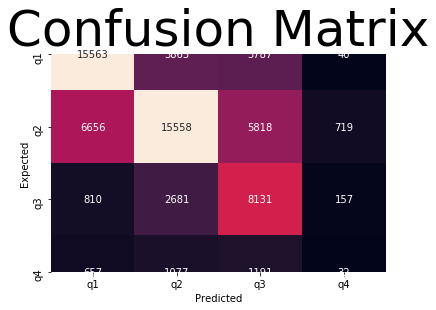

In [54]:
confusion_matrix =  pd.crosstab(index=y_val, columns=predVal.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 50)
plt.show()

In [58]:
X_numeric.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')

In [66]:
X_val.var()

0.9988059314333774

In [67]:
len(X_numeric.columns) 

14

In [69]:
# gamma scale
1 / (len(X_numeric.columns) * X_val.var())

0.07151396400506446

 **End of SVC**